In [70]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 885 kB/s 


In [71]:
# Packages for EDA 
import pandas as pd 
import numpy as np 
import seaborn as sns 

# Data Preprocessing
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
np.seterr(divide='ignore', invalid='ignore', over='ignore')


# Showing Plots inside notebook
%matplotlib inline  
sns.set(rc={'figure.figsize': [7, 14]}, font_scale=1.2) # Standard figure size for all 

In [72]:
df = pd.read_csv("/content/Cleaned_Data.csv")
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4737,4823,4823,Volkswagen Polo,Chennai,2012,64806,Petrol,Manual,First,16.47,1198,73.9,5,3.65,Volkswagen
554,569,569,Toyota Corolla,Pune,2010,31000,Petrol,Manual,First,12.50,1794,132.0,5,5.00,Toyota
4256,4336,4336,Maruti Ciaz,Bangalore,2016,23988,Diesel,Manual,First,28.09,1248,88.5,5,7.75,Maruti
1965,2004,2004,Volkswagen Vento,Mumbai,2015,23001,Petrol,Manual,First,15.04,1598,103.2,5,5.49,Volkswagen
1307,1337,1337,Honda City,Kochi,2016,54317,Petrol,Manual,First,17.40,1497,117.3,5,8.40,Honda


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5912 non-null   int64  
 1   Unnamed: 0.1       5912 non-null   int64  
 2   Name               5912 non-null   object 
 3   Location           5912 non-null   object 
 4   Year               5912 non-null   int64  
 5   Kilometers_Driven  5912 non-null   int64  
 6   Fuel_Type          5912 non-null   object 
 7   Transmission       5912 non-null   object 
 8   Owner_Type         5912 non-null   object 
 9   Mileage            5912 non-null   float64
 10  Engine             5912 non-null   int64  
 11  Power              5912 non-null   float64
 12  Seats              5912 non-null   int64  
 13  Price              5912 non-null   float64
 14  Brand              5912 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 692.9+ KB


In [74]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5912.000000,5912.000000,5.912000e+03,5912.000000,5912.000000,5912.000000,5912.00000,5912.000000
mean,3012.791272,3012.791272,2013.450609,5.837766e+04,18.231778,1622.857070,113.014026,5.28180,9.584919
std,1735.810485,1735.810485,3.188638,9.189848e+04,4.431628,600.877459,53.797403,0.80269,11.233694
min,0.000000,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.00000,0.440000
25%,1510.750000,1510.750000,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.00000,3.500000
50%,3013.500000,3013.500000,2014.000000,5.286250e+04,18.200000,1493.000000,94.000000,5.00000,5.700000
75%,4515.250000,4515.250000,2016.000000,7.245375e+04,21.100000,1984.000000,138.100000,5.00000,10.012500
max,6018.000000,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.00000,160.000000


In [75]:
df.duplicated().sum()

0

In [76]:
df.drop_duplicates(inplace=True)

In [123]:
df.drop("Price", axis=1, inplace=True)

KeyError: ignored

In [79]:
from sklearn.impute import SimpleImputer

null_col = ['Mileage', 'Engine' , 'Power','Seats']

imputer = SimpleImputer(strategy='most_frequent')
df[null_col] = imputer.fit_transform(df[null_col])

In [80]:
df = df.convert_dtypes()

In [81]:
df['Seats'].replace(to_replace=0 ,value= df['Seats'].mode()[0],inplace=True)

In [82]:
df[df['Power'] == 'null bhp']

,Unnamed: 0,Unnamed: 0.1,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand


In [83]:
indx = df[df['Power'] == 'null bhp'].index

In [84]:
df.drop(indx,axis=0,inplace=True)

In [85]:
dirty_cols = ['Mileage', 'Engine', 'Power']

In [87]:
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
5822,5927,5927,Audi Q5,Coimbatore,2018,29091,Diesel,Automatic,First,13.22,2967,241.4,5,Audi
1008,1033,1033,Hyundai Xcent,Coimbatore,2016,14656,Diesel,Manual,First,24.4,1120,71.0,5,Hyundai
3678,3751,3751,Honda Amaze,Kolkata,2013,40000,Petrol,Manual,First,18.0,1198,86.7,5,Honda
1892,1930,1930,Mercedes-Benz S,Mumbai,2007,55000,Petrol,Automatic,Third,10.13,3498,364.9,5,Mercedes-Benz
3313,3377,3377,BMW 3,Mumbai,2009,61500,Diesel,Automatic,Second,16.07,1995,181.0,5,BMW


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 5911
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5912 non-null   Int64  
 1   Unnamed: 0.1       5912 non-null   Int64  
 2   Name               5912 non-null   string 
 3   Location           5912 non-null   string 
 4   Year               5912 non-null   Int64  
 5   Kilometers_Driven  5912 non-null   Int64  
 6   Fuel_Type          5912 non-null   string 
 7   Transmission       5912 non-null   string 
 8   Owner_Type         5912 non-null   string 
 9   Mileage            5912 non-null   Float64
 10  Engine             5912 non-null   Int64  
 11  Power              5912 non-null   Float64
 12  Seats              5912 non-null   Int64  
 13  Brand              5912 non-null   string 
dtypes: Float64(2), Int64(6), string(6)
memory usage: 868.0 KB


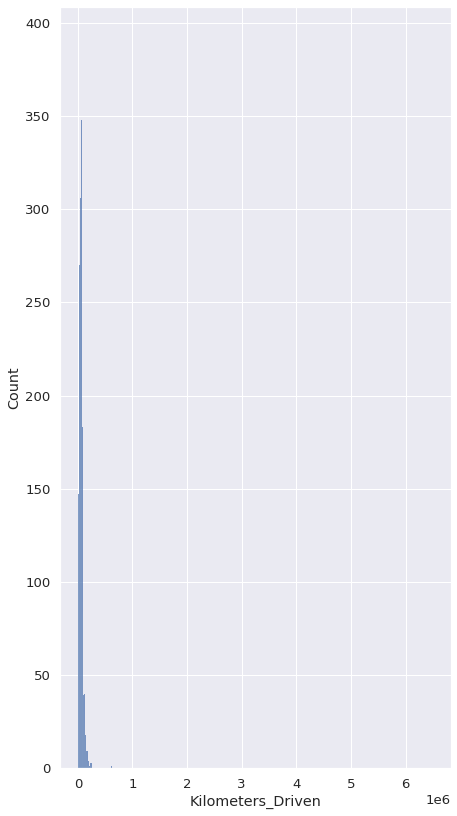

In [97]:
sns.histplot(data = df , x = 'Kilometers_Driven');

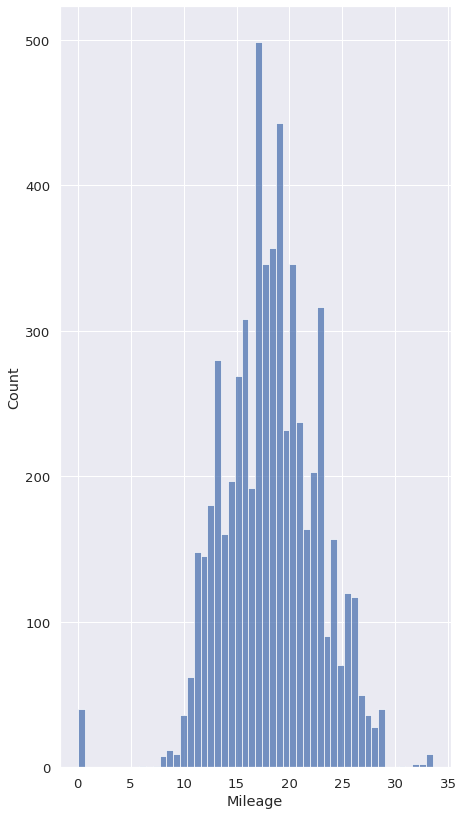

In [99]:
sns.histplot(data = df , x = 'Mileage');

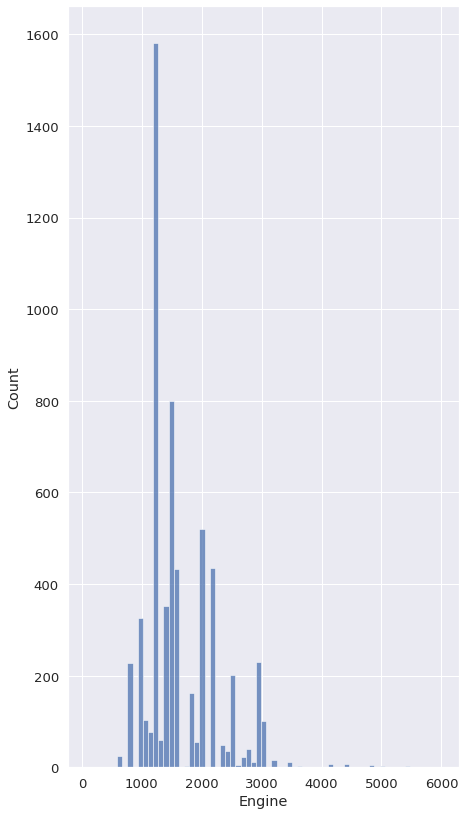

In [100]:
sns.histplot(data = df , x = 'Engine');

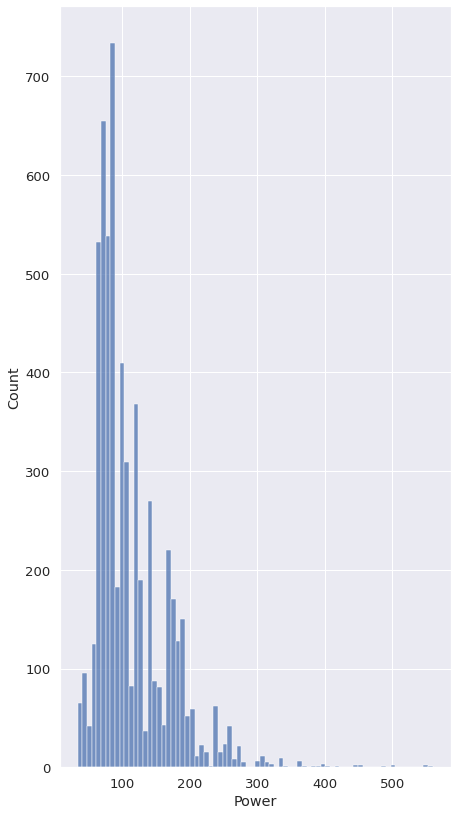

In [101]:
sns.histplot(data = df , x = 'Power');

In [104]:
numerical_cols = ['Kilometers_Driven' , 'Mileage' , 'Engine' , 'Power','Price']

In [105]:
pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 52.3 MB/s 
     |████████████████████████████████| 1.6 MB 55.2 MB/s 
     |████████████████████████████████| 83 kB 1.1 MB/s 


In [108]:
df_nums = df.copy()
from datasist.structdata import detect_outliers 

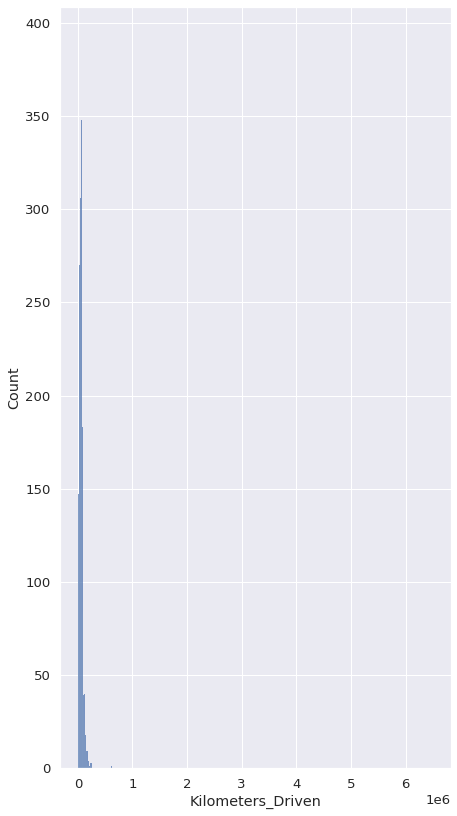

In [110]:
sns.histplot(data = df_nums , x = 'Kilometers_Driven');

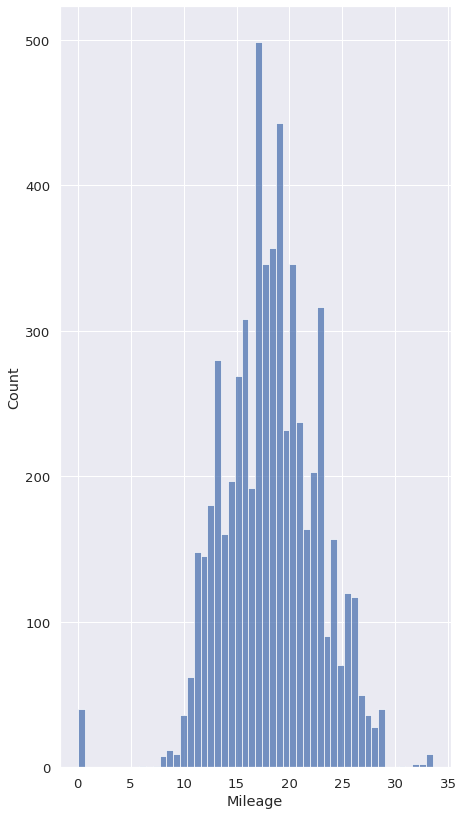

In [111]:
sns.histplot(data = df_nums , x = 'Mileage');

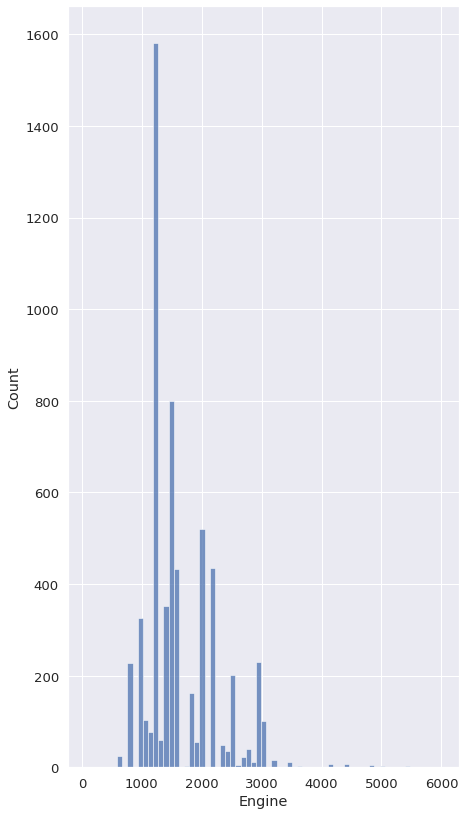

In [112]:
sns.histplot(data = df_nums , x = 'Engine');

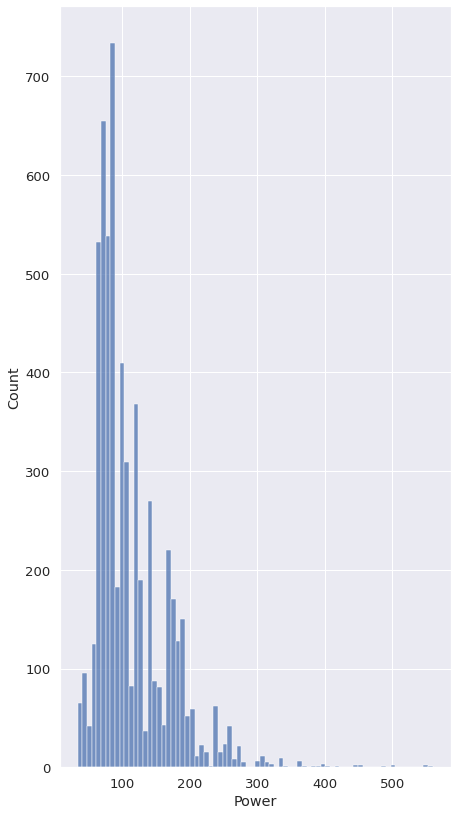

In [113]:
sns.histplot(data = df_nums , x = 'Power');

In [89]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

In [90]:
df['Owner_Type'] = df['Owner_Type'].map(transformation)

In [91]:
Nominal_data = ['Name','Location','Fuel_Type','Transmission','Brand']
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
df = binaryencoder.fit_transform(df)

In [92]:
Numerical_data = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']

In [93]:
# power = PowerTransformer()
new_df = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns, index=df.index)